In [444]:
import os
import numpy as np
import pandas as pd
import datetime as dt
import urllib.request, json
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# This code was tested with TensorFlow v2.1.0
print("Your installed TensorFlow version", tf.__version__)

import tensorflow.keras as keras
from tensorflow.keras.models import load_model

Your installed TensorFlow version 2.1.0


In [445]:
#Stock market prices are highly unpredictable and volatile. as a stock buyer you can reasonably decide when to buy stocks and 
#when to sell them to make a profit. This is where time series modelling comes in.

datapath = "RENATA_16-Apr-2018_15-Apr-2020.csv"

data = pd.read_csv(datapath)

print(data.shape)

data.describe()

(464, 11)


,LTP*,HIGH,LOW,OPENP*,CLOSEP*,YCP,TRADE,VALUE (mn),VOLUME
count,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,1182.300647,1190.628233,1174.426509,1182.536638,1189.587284,1190.014871,254.193966,13.361278,11143.467672
std,115.699320,115.578026,114.902468,115.103731,65.935932,65.572448,192.188670,17.052483,13693.103967
min,0.000000,0.000000,0.000000,0.000000,982.800000,982.800000,0.000000,0.000000,0.000000
25%,1146.875000,1152.075000,1142.175000,1148.975000,1147.300000,1147.650000,132.000000,4.566750,3869.500000
50%,1187.500000,1198.000000,1181.150000,1187.900000,1188.150000,1188.400000,213.500000,8.190500,6932.500000
75%,1237.350000,1243.200000,1231.925000,1238.850000,1237.625000,1237.625000,306.250000,14.768000,12439.750000
max,1346.800000,1350.000000,1312.000000,1340.000000,1345.800000,1345.800000,1371.000000,140.592000,110281.000000


In [446]:
# LTP* = Last Traded Price
# YCP = Yesterday's Closing Price,
# OPENP* = Opening Price
# CLOSEP* = Closing Price

print(data.columns)

data.head()

Index(['DATE', 'TRADING CODE', 'LTP*', 'HIGH', 'LOW', 'OPENP*', 'CLOSEP*',
       'YCP', 'TRADE', 'VALUE (mn)', 'VOLUME'],
      dtype='object')


,DATE,TRADING CODE,LTP*,HIGH,LOW,OPENP*,CLOSEP*,YCP,TRADE,VALUE (mn),VOLUME
0,2020-03-25,RENATA,1026.2,1026.2,1026.2,1026.2,1026.2,1026.2,109,69.810,68028
1,2020-03-24,RENATA,1026.2,1026.2,1026.2,1026.2,1026.2,1026.2,71,31.929,31114
2,2020-03-23,RENATA,1026.2,1026.2,1026.2,1026.2,1026.2,1026.2,108,34.128,33257
3,2020-03-22,RENATA,1026.2,1046.5,1026.2,1031.0,1026.2,1034.2,52,12.321,12006
4,2020-03-19,RENATA,1031.0,1036.8,1030.0,1036.8,1034.2,982.8,28,1.898,1835


In [447]:
#check missing or null or any values
print("Null Values: " + str(data.isnull().any().sum()))
data = data.sort_values(["DATE"], ascending=True)
data.dtypes

Null Values: 0


DATE             object
TRADING CODE     object
LTP*            float64
HIGH            float64
LOW             float64
OPENP*          float64
CLOSEP*         float64
YCP             float64
TRADE             int64
VALUE (mn)      float64
VOLUME            int64
dtype: object

In [448]:
#Remove Unnecessary Columns
deleteCols = ["LTP*", "YCP"]
data = data.drop(deleteCols, axis=1)

#Rename Columns
data.rename(columns = {'OPENP*':'OPENP', 'CLOSEP*':'CLOSEP', 'TRADING CODE':'INSTRUMENT'}, inplace = True)

data

,DATE,INSTRUMENT,HIGH,LOW,OPENP,CLOSEP,TRADE,VALUE (mn),VOLUME
463,2018-04-16,RENATA,1236.6,1225.0,1236.6,1226.4,136,5.943,4839
462,2018-04-17,RENATA,1249.0,1226.5,1226.5,1246.4,110,2.362,1897
461,2018-04-18,RENATA,1250.0,1240.0,1246.4,1246.0,89,3.267,2617
460,2018-04-19,RENATA,1247.0,1240.0,1246.9,1241.1,92,4.156,3339
459,2018-04-22,RENATA,1242.4,1231.5,1235.5,1234.2,153,2.463,1997
...,...,...,...,...,...,...,...,...,...
4,2020-03-19,RENATA,1036.8,1030.0,1036.8,1034.2,28,1.898,1835
3,2020-03-22,RENATA,1046.5,1026.2,1031.0,1026.2,52,12.321,12006
2,2020-03-23,RENATA,1026.2,1026.2,1026.2,1026.2,108,34.128,33257
1,2020-03-24,RENATA,1026.2,1026.2,1026.2,1026.2,71,31.929,31114


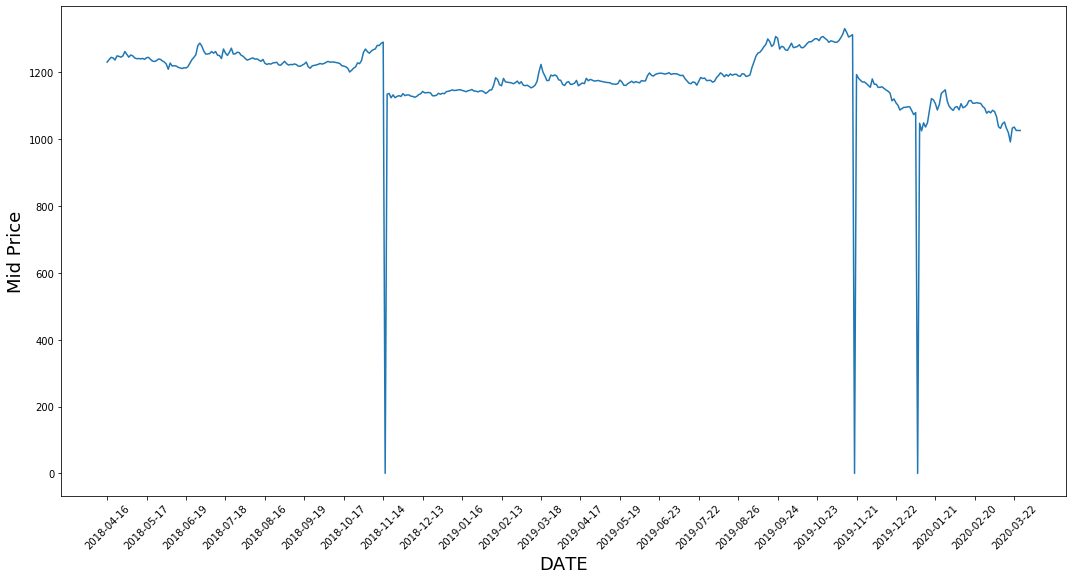

In some day data is not present!


In [449]:
#Data Visualization
plt.figure(figsize = (18,9))
plt.plot(range(data.shape[0]), (data['LOW']+data['HIGH'])/2.0)
plt.xticks(range(0,data.shape[0],20),data['DATE'].loc[::20], rotation=45)
plt.xlabel('DATE', fontsize=18)
plt.ylabel('Mid Price', fontsize=18)
plt.show()

print("In some day data is not present!")

In [450]:
# Remove rows with zero values
df = data[(data["HIGH"] != 0) | (data["LOW"] != 0)]
df = df.reset_index(drop=True)

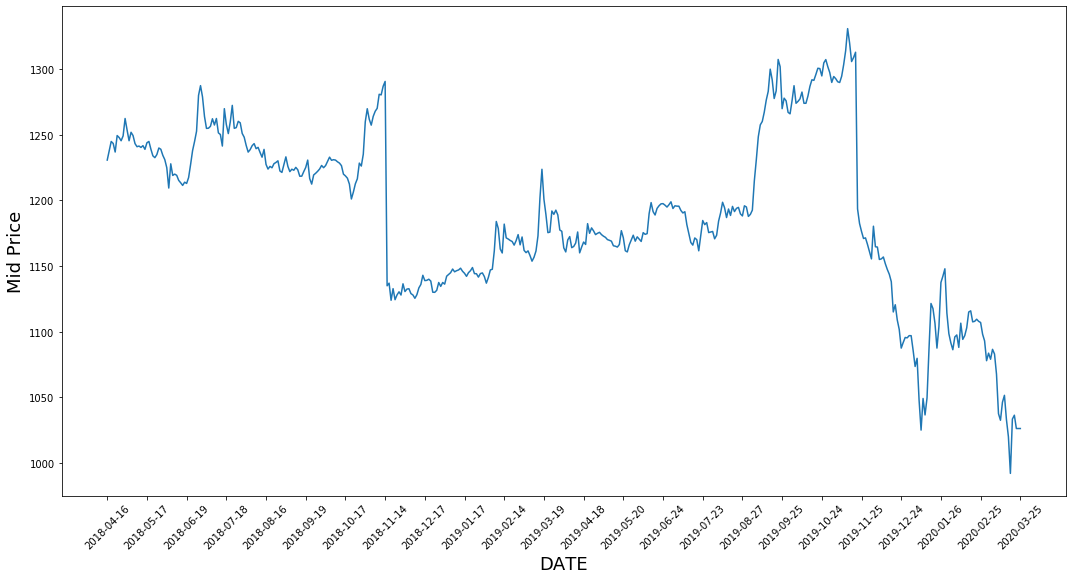

In [451]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]), (df['LOW'] + df['HIGH'])/2.0)
plt.xticks(range(0, df.shape[0],20),df['DATE'].loc[::20], rotation=45)
plt.xlabel('DATE', fontsize=18)
plt.ylabel('Mid Price', fontsize=18)
plt.show()

In [452]:
# Splitting Data
# Working on the mid prices from the highest and lowest
high_prices = df['HIGH']
low_prices = df['LOW']
mid_prices = (high_prices+low_prices)/2.0

# Set first 85% values as training data and the rest as test data
train_data_size = int(len(mid_prices) * 0.85)
train_data = mid_prices[:train_data_size].values
test_data = mid_prices[train_data_size:].values

print("#Train Data:%d" % train_data_size)
print("#Test Data:%d" % len(test_data))

#Train Data:391
#Test Data:70


In [453]:
# Normalizing the Data

scaler = MinMaxScaler()

train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

# Train the Scaler with training data and smooth data i.e. at 4 points
smoothing_window_size = 90
for i in range(0, 360, smoothing_window_size):
    scaler.fit(train_data[i:i + smoothing_window_size, :])
    train_data[i:i+smoothing_window_size, :] = scaler.transform(train_data[i:i + smoothing_window_size, :])

# Normalize the remaining data
scaler.fit(train_data[i + smoothing_window_size:, :])
train_data[i + smoothing_window_size:, :] = scaler.transform(train_data[i + smoothing_window_size:, :])

# Reshape both train and test data
train_data = train_data.reshape(-1)

# Normalize test data
test_data = scaler.transform(test_data).reshape(-1)

# Exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data
EMA = 0.0
gamma = 0.1
for i in range(360):
  EMA = gamma*train_data[i] + (1-gamma)*EMA
  train_data[i] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data], axis=0)

In [454]:
# Prediction via Averaging (standard averaging and exponential moving average)
# Evaluate both qualitatively (visual inspection) and quantitatively (Mean Squared Error) the results produced 
# by the two algorithms

# Standard Average
window_size = 15
N = train_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size, N):
     
    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = df.loc[pred_idx,'DATE']

    std_avg_predictions.append(np.mean(train_data[pred_idx - window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_data[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for standard averaging: 0.00933


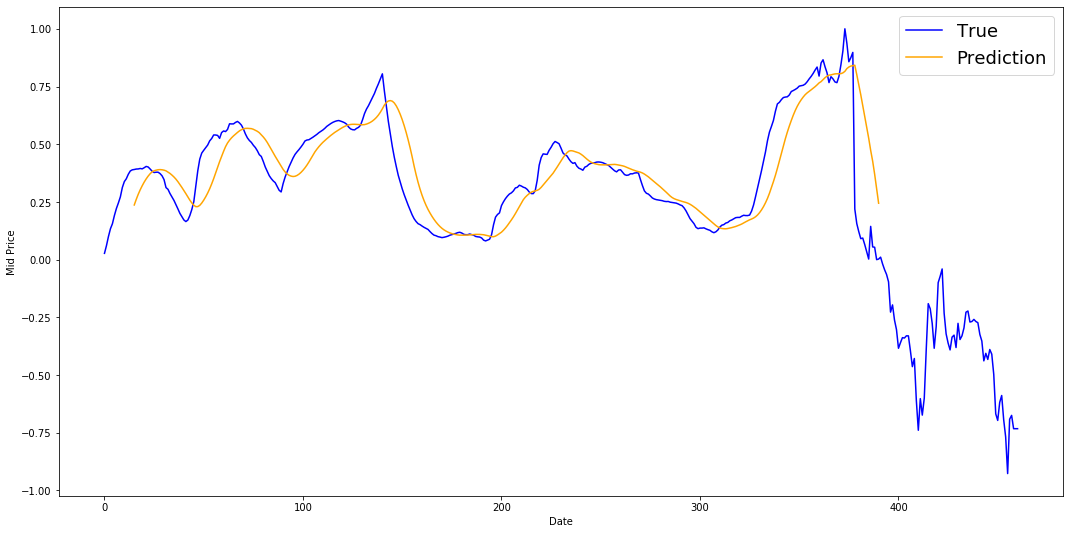

In [455]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Prediction')
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

In [456]:
# Exponential Moving Average
window_size = 15
N = train_data.size

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):

    running_mean = running_mean*decay + (1.0-decay)*train_data[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-train_data[pred_idx])**2)
    run_avg_x.append(date)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for EMA averaging: 0.00149


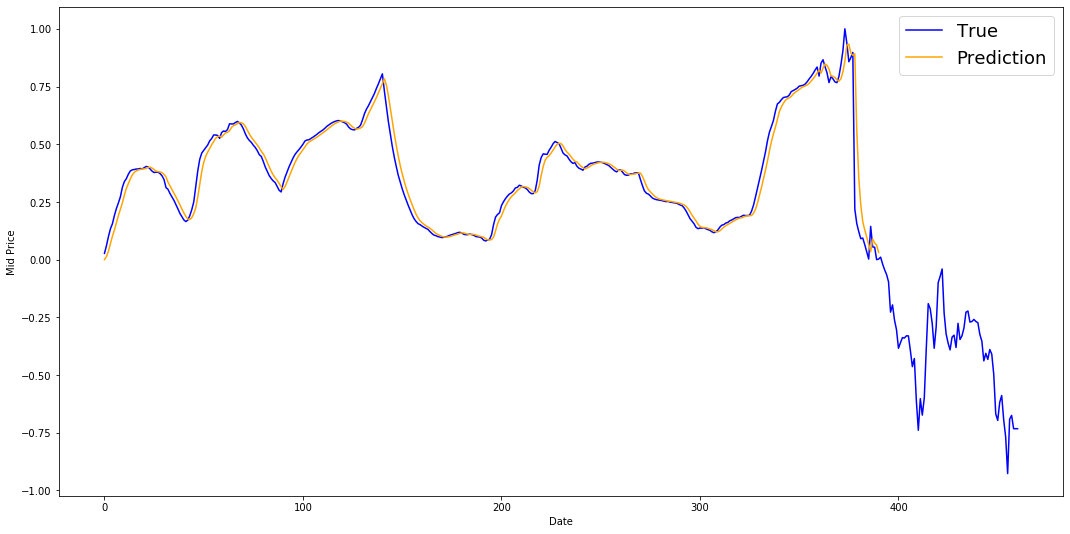

In [457]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

In [458]:
# keep only the required columns
mid_df = pd.DataFrame({'MIDPRICE': (high_prices+low_prices)/2.0})
mid_df = pd.DataFrame(df["DATE"]).join(mid_df)

# set the date column as index
mid_df.set_index(["DATE"], inplace=True)

dataset = mid_df.values
train_data_size = int(len(dataset) * 0.85)

print("Dataset Size:%d " % len(dataset))
print("Train Dataset size:%d " % train_data_size)

# First 80% values as training data and the rest as test data
train_data = dataset[:train_data_size]
test_data = dataset[train_data_size:]

# scaling the values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

Back = 30
# creating x_train and y_train, seeting the array as 0 dimensional, each time x_train.append is giving 
#'Back' values with 0 dimension,then set each as rows
x_train, y_train = [], []
for i in range(Back, len(train_data)):
    x_train.append(scaled_data[i - Back : i, 0])
    y_train.append(scaled_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

# turn x_train as three dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

Dataset Size:461 
Train Dataset size:391 


In [459]:
print(x_train.shape)
print(y_train.shape)

(361, 30, 1)
(361,)


In [460]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# set the model saved file name
filenname = data['INSTRUMENT'][0] + "weights.hdf5"

In [461]:
# Compile the model for MAPE and adam optimizer
model.compile( loss="mean_absolute_percentage_error", optimizer="adam")  

# model will wait for the next 200 model, if no improvement, stop
ks = keras.callbacks.EarlyStopping(monitor="val_loss", mode="auto", verbose=1, patience=200)  

# Save best model
checkpointer = keras.callbacks.ModelCheckpoint(filepath=filenname, monitor="loss", verbose=0, save_best_only=True)  

# Run 4000 trials for best model
model.fit(x_train, y_train, epochs=1000, validation_split=0.1, verbose=0, 
          callbacks=[ks, checkpointer] )  

Epoch 00415: early stopping


In [462]:
# Best model will be loaded from saved file
model = load_model(filenname)

# predicting values, using past 'Back' from the train data
inputs = dataset[len(dataset) - len(test_data) - Back :]
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

In [463]:
# creating X_test
X_test = []
for i in range(Back, inputs.shape[0]):
    X_test.append(inputs[i - Back : i, 0])
X_test = np.array(X_test)

# turn X_test into 3 dimensional
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# forecasting future values ie calculating y_test
predicted = model.predict(X_test)
cl = predicted

# turning the forecasting values back to original scale
predicted = scaler.inverse_transform(predicted)

# model evaluate
train_acc = model.evaluate(x_train, y_train, verbose=0)
test_acc = model.evaluate(X_test, cl, verbose=0)
print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

# calculating MAPE
RMS = np.sqrt(np.mean(np.power((test_data - predicted), 2)))
MAPE = sum(abs(test_data - predicted) / abs(test_data)) * 100 * (1 / len(test_data))

Train Accuracy: 3.136, Test Accuracy: 0.000


In [464]:
print("RMS: %.5f, MAPE: %.5f" %(RMS, MAPE))

RMS: 18.34949, MAPE: 1.27092


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


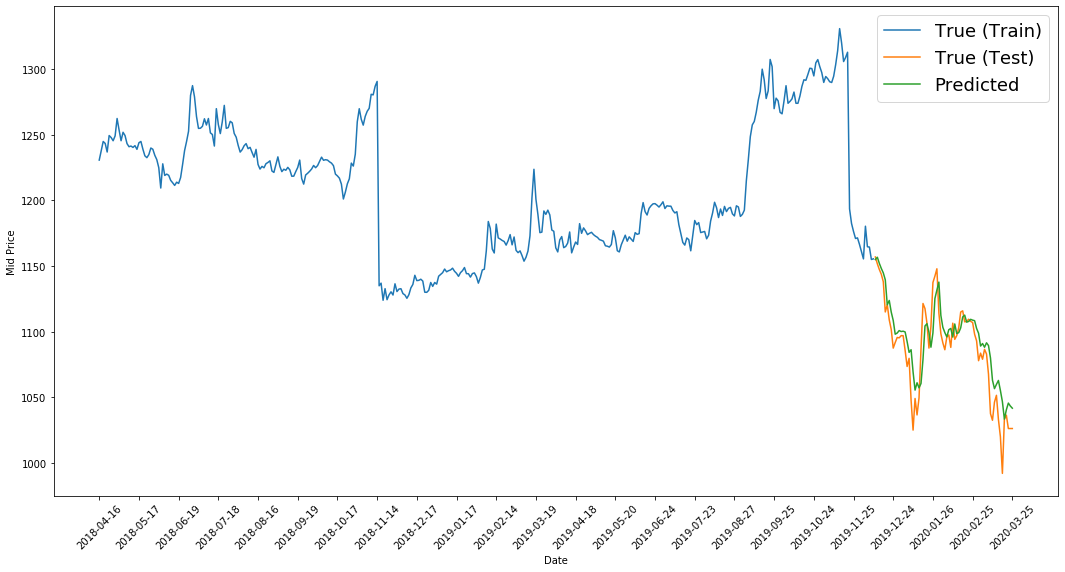

In [467]:
plt.figure(figsize = (18,9))
train = mid_df[:train_data_size]
test = mid_df[train_data_size:]
test['Predicted'] = predicted
plt.xlabel('Date')
plt.ylabel('Mid Price')
#plt.plot(range(train.shape[0]), train['MIDPRICE'], label='True (Train)')
plt.plot(train['MIDPRICE'], label='True (Train)')
plt.plot(test[['MIDPRICE']], label='True (Test)')
plt.plot(test[['Predicted']], label='Predicted')
plt.xticks(range(0, mid_df.shape[0],20), rotation=45)
plt.legend(fontsize=18)
plt.show()